Importing libraries

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

load data

In [48]:
df = pd.read_csv("mall_customers_dataset.csv")
df.drop(columns=["CustomerID"], inplace=True)

In [49]:
df

,Gender,Age,Annual Income (Rs.),Spending Score (1-100),Time Spent in Mall (minutes),Visits per Month,Distance from Home (km),Has Credit Card,Preferred Shop Type
0,Male,NaN,199522.0,65.0,36.0,11.0,23.73,0.0,Grocery
1,Female,19.0,380233.0,21.0,112.0,7.0,17.66,0.0,Clothing
2,Male,23.0,548102.0,27.0,206.0,22.0,NaN,0.0,Electronics
3,Male,45.0,157485.0,70.0,118.0,21.0,42.79,0.0,Electronics
4,Male,46.0,262701.0,44.0,150.0,8.0,1.60,1.0,Grocery
...,...,...,...,...,...,...,...,...,...
2995,Male,NaN,571777.0,56.0,201.0,17.0,35.41,0.0,Furniture
2996,Male,34.0,462712.0,44.0,181.0,14.0,27.10,0.0,Furniture
2997,Male,43.0,1045781.0,57.0,43.0,5.0,23.73,0.0,Furniture
2998,Female,19.0,1009734.0,6.0,106.0,23.0,25.81,0.0,Furniture


Handle missing values

In [50]:
num_cols=['Age', 'Annual Income (Rs.)', 'Spending Score (1-100)',
       'Time Spent in Mall (minutes)', 'Visits per Month',
       'Distance from Home (km)', 'Has Credit Card']
cat_cols=['Gender', 'Preferred Shop Type']
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Jyoti Pawar\AppData\Local\Temp\ipykernel_28264\3553208552.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Jyoti Pawar\AppData\Local\Temp\ipykernel_28264\3553208552.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


One-hot encode categorical variables

In [51]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

Scale numerical values

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [53]:
X_scaled=pd.DataFrame(X_scaled,columns=scaler.get_feature_names_out(),index=df_encoded.index)

In [54]:
X_scaled

,Age,Annual Income (Rs.),Spending Score (1-100),Time Spent in Mall (minutes),Visits per Month,Distance from Home (km),Has Credit Card,Gender_Male,Preferred Shop Type_Electronics,Preferred Shop Type_Furniture,Preferred Shop Type_Grocery
0,0.000000,-1.609085,0.483711,-1.257202,-0.495269,-9.767898e-02,-1.011162,0.958206,-0.618972,-0.579403,1.789324
1,-1.655372,-1.082574,-1.063375,-0.129480,-0.984957,-5.229794e-01,-1.011162,-1.043617,-0.618972,-0.579403,-0.558870
2,-1.386246,-0.593480,-0.852409,1.265335,0.851372,2.489243e-16,-1.011162,0.958206,1.615583,-0.579403,-0.558870
3,0.093944,-1.731562,0.659516,-0.040449,0.728950,1.237778e+00,-1.011162,0.958206,1.615583,-0.579403,-0.558870
4,0.161225,-1.425010,-0.254671,0.434381,-0.862535,-1.648239e+00,1.020951,0.958206,-0.618972,-0.579403,1.789324
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.000000,-0.524501,0.167261,1.191142,0.239262,7.206914e-01,-1.011162,0.958206,-0.618972,1.725914,-0.558870
2996,-0.646151,-0.842268,-0.254671,0.894373,-0.128003,1.384433e-01,-1.011162,0.958206,-0.618972,1.725914,-0.558870
2997,-0.040619,0.856533,0.202422,-1.153333,-1.229801,-9.767898e-02,-1.011162,0.958206,-0.618972,1.725914,-0.558870
2998,-1.655372,0.751508,-1.590791,-0.218510,0.973794,4.805822e-02,-1.011162,-1.043617,-0.618972,1.725914,-0.558870


Usng elbow method

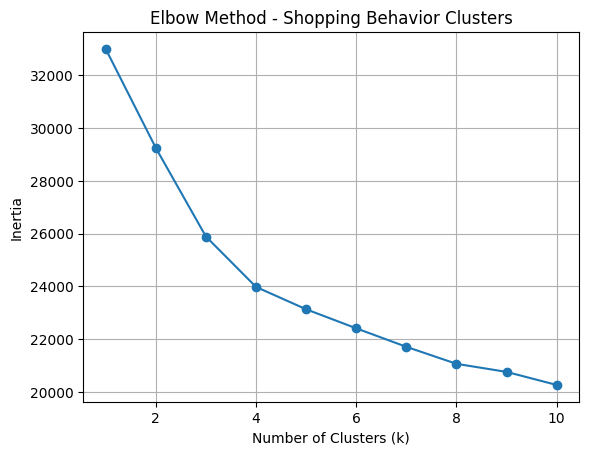

In [55]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Elbow Method - Shopping Behavior Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

KMeans clustering

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

Add cluster labels to original data

In [57]:
df["Cluster"] = clusters

PCA for visualization

In [58]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

Plot cluster as scatter plot

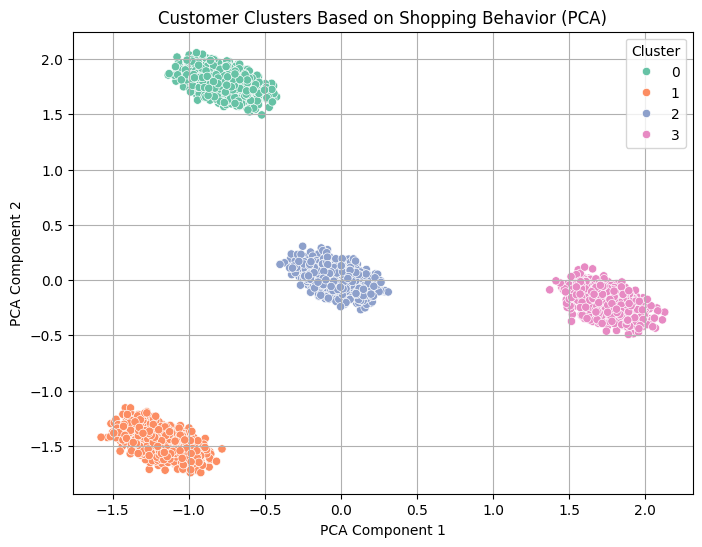

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Customer Clusters Based on Shopping Behavior (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

Cluster summaries

In [60]:
numeric_summary=(df.groupby("Cluster").mean(numeric_only=True))

In [61]:
preferred_shops = (
    df.groupby('Cluster')['Preferred Shop Type']
    .agg(lambda x: x.mode().iloc[0])  
    .to_frame(name='Preferred Shop Type')
)

summary = numeric_summary.join(preferred_shops)


In [62]:
summary

,Age,Annual Income (Rs.),Spending Score (1-100),Time Spent in Mall (minutes),Visits per Month,Distance from Home (km),Has Credit Card,Preferred Shop Type
Cluster,,,,,,,,
0,43.018524,739283.824555,50.854486,122.196826,15.288771,25.012184,0.493640,Grocery
1,43.542514,751555.329574,50.835110,120.363140,15.053413,24.677692,0.491306,Furniture
2,43.442548,754836.264026,51.849974,117.667734,14.399755,25.883808,0.512767,Clothing
3,44.298003,760209.217247,51.434866,122.371164,15.374358,24.984443,0.493887,Electronics
